In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler , MinMaxScaler , PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

from scipy import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

import mlflow
import mlflow.sklearn

import pickle

In [2]:
df = pd.read_csv('Admission_data.csv', index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


* The dataset contains zero null values

In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [5]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

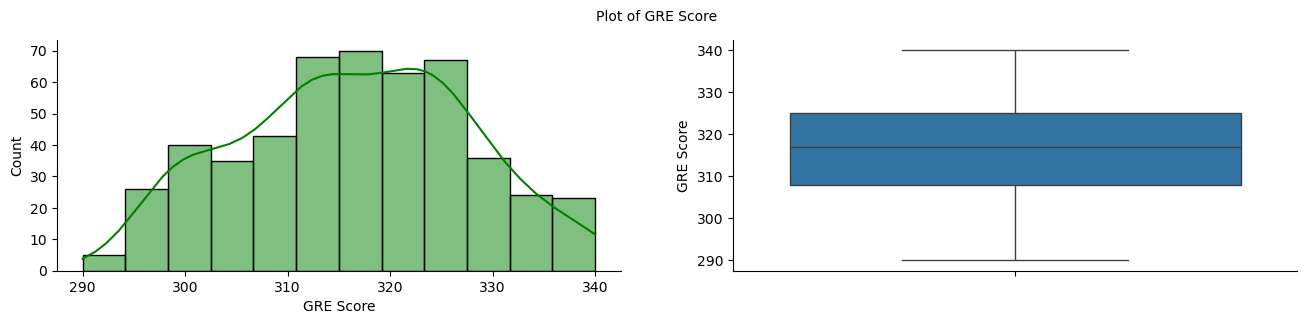

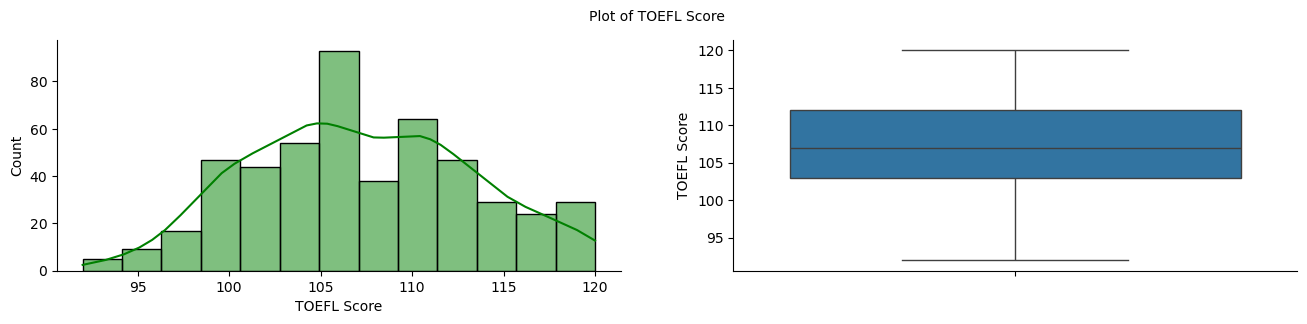

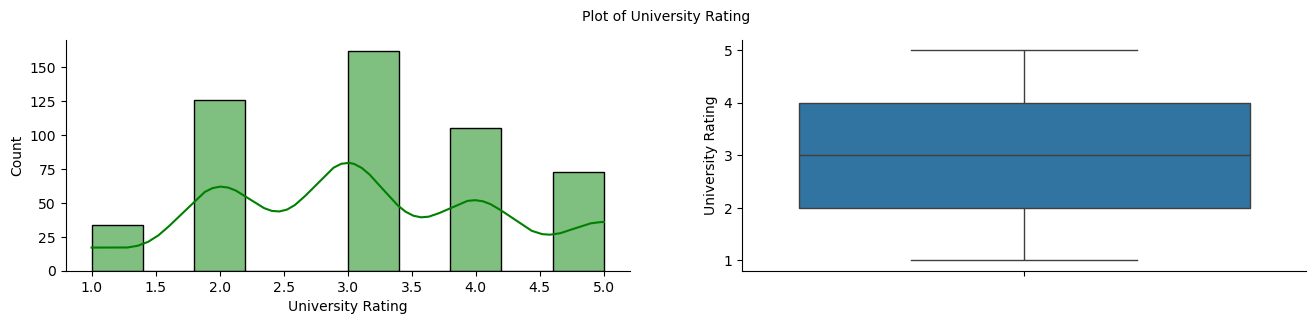

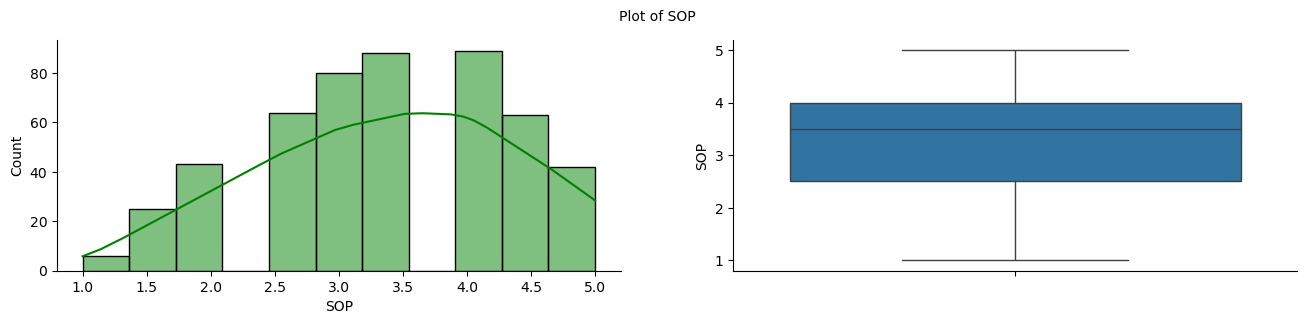

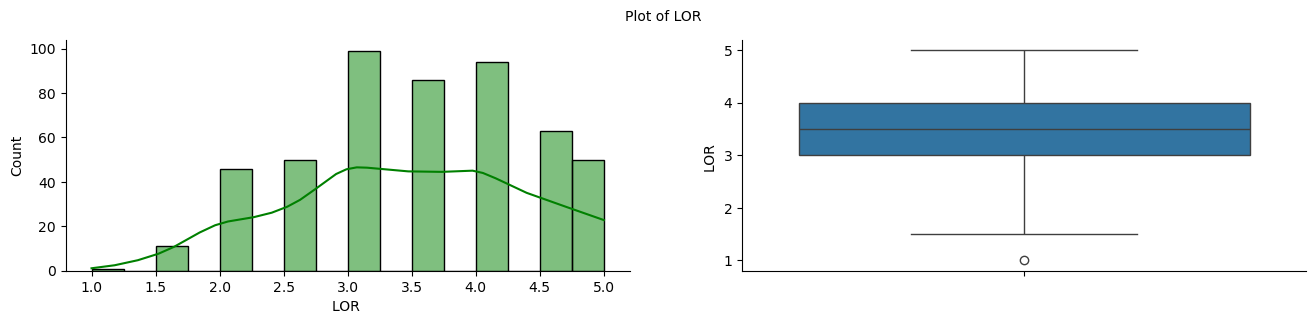

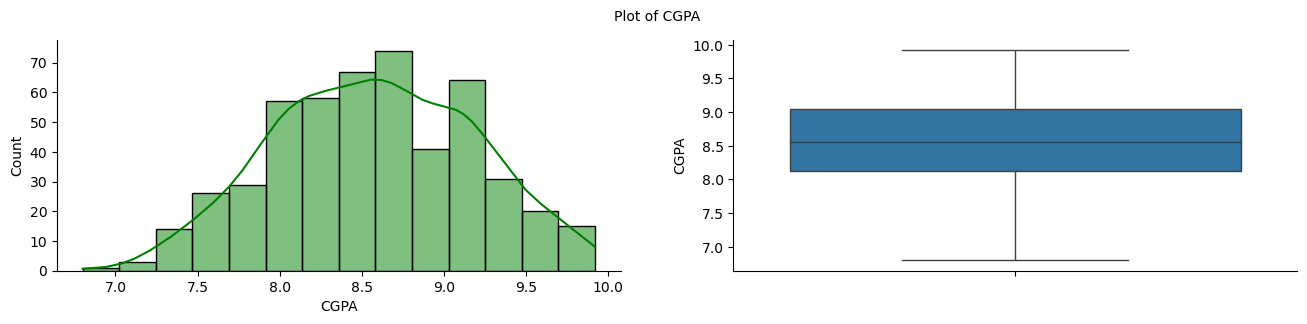

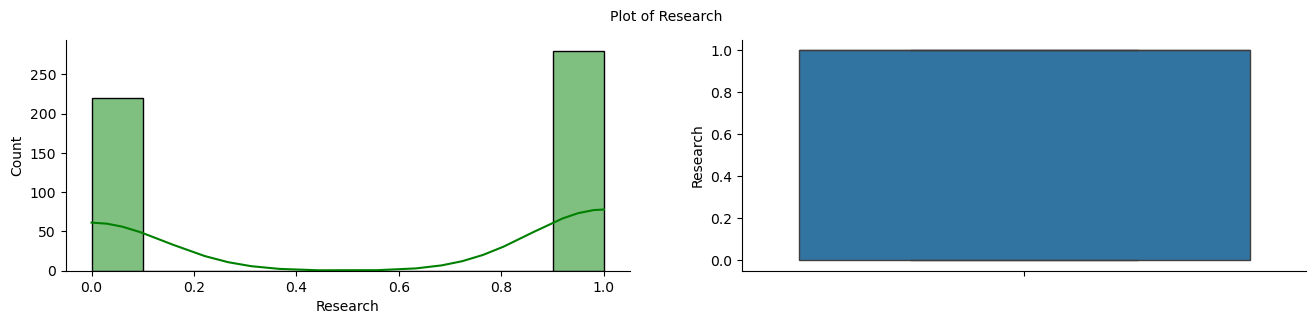

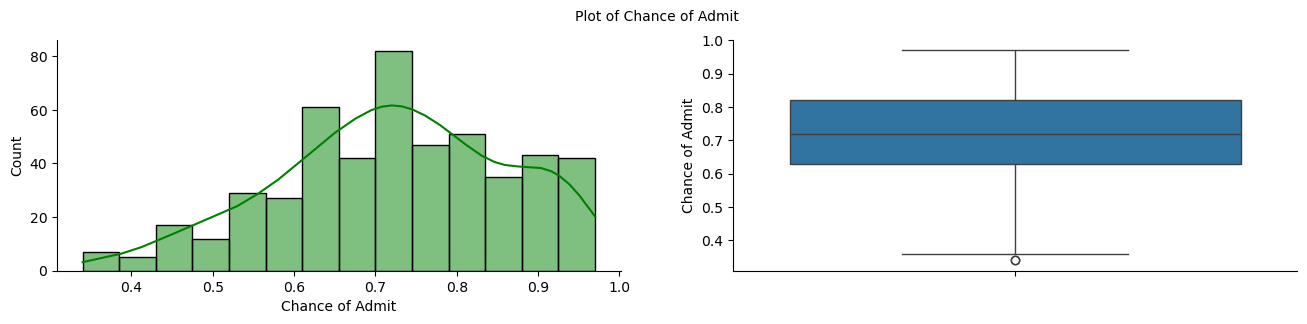

In [7]:
for i in df.columns:
    plt.style.use('default')
    plt.style.use('fast')
    plt.figure(figsize = (16,3))
    plt.subplot(122)
    sns.boxplot(df[i])
    plt.subplot(121)
    sns.histplot(df[i],kde=True,color='g')
    plt.suptitle(f'Plot of {i}',fontsize=10)
    sns.despine()
    plt.show()

* Outliers
    * There are no outliers present in the dataset except for LOR. Since range of LOR is between 1 and 5, no need to treat that outlier

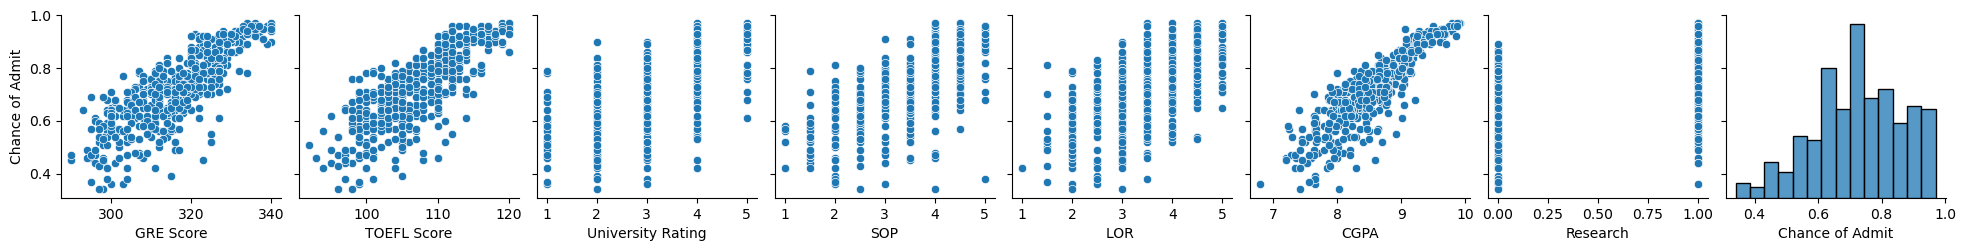

In [8]:
sns.pairplot(data=df, y_vars='Chance of Admit')
plt.show()

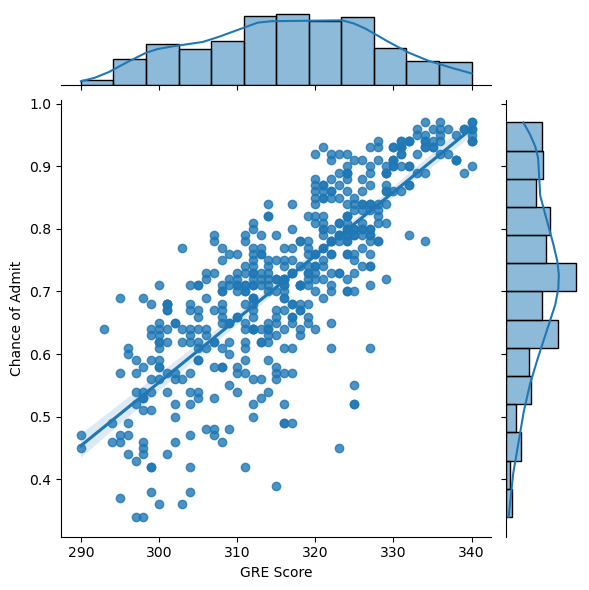

In [9]:
sns.jointplot(data=df, x = df['GRE Score'], y=df['Chance of Admit'], kind='reg')
plt.show()

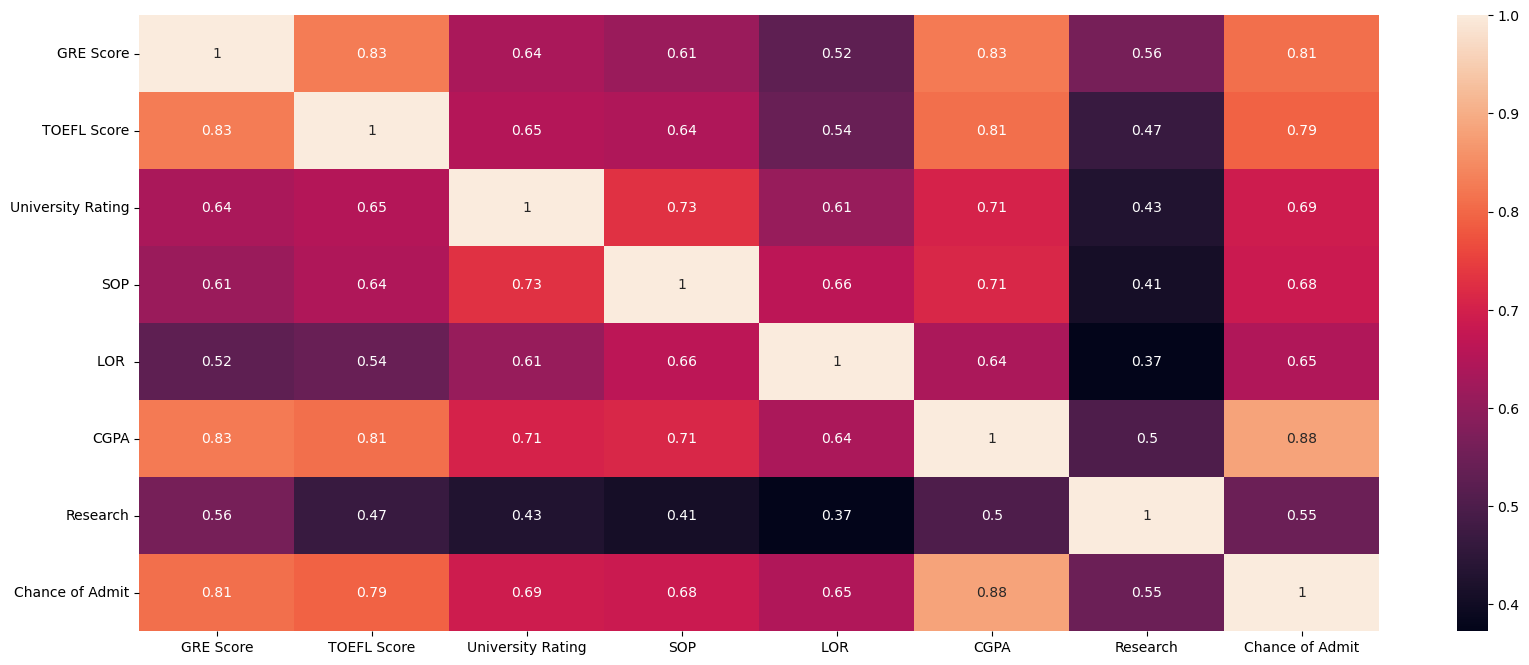

In [10]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [25]:
# Function to evaluate the model
def model_evaluation(y_true, y_pred, model):
    print(f"Model: {model}")
    print(f"R2 Score: {round(r2_score(y_true, y_pred), 2)}")
    print(f"MAE: {round(mean_absolute_error(y_true, y_pred), 2)}")
    print(f"MSE: {round(mean_squared_error(y_true, y_pred), 2)}")
    print(f"RMSE: {round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)}")
    print()

In [12]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [15]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
pickle.dump(X_train_scaled, open('x_train_scaled.pkl', 'wb'))
pickle.dump(X_test_scaled, open('x_test_scaled.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))

In [17]:
#save the scaled data into pickle file

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [18]:
mlflow.set_experiment('Admission Prediction')

<Experiment: artifact_location='file:///d:/scaler/student_enrollment_regression/mlruns/562312793288150031', creation_time=1742229201542, experiment_id='562312793288150031', last_update_time=1742229201542, lifecycle_stage='active', name='Admission Prediction', tags={}>

In [19]:
#model
lr_model = LinearRegression()

In [20]:
def ml_flow_logging(X_train_scaled, X_test_scaled, y_train, y_test, model, run_name, **params):
    '''
    Order of passing variables: X_train_scaled, X_test_scaled, y_train, y_test, model, run_name, **params
    '''
    with mlflow.start_run(run_name=run_name):
        #model
        model.fit(X_train_scaled, y_train)

        #prediction
        y_train_pred = lr_model.predict(X_train_scaled)
        y_test_pred = lr_model.predict(X_test_scaled)

        #evaluation
        R2_Score = r2_score(y_test, y_test_pred)
        MAE = mean_absolute_error(y_test, y_test_pred)
        MSE = mean_squared_error(y_test, y_test_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

        #logging
        mlflow.log_param('model_name', model)
        mlflow.log_metric('R2_Score', R2_Score)
        mlflow.log_metric('MAE', MAE)
        mlflow.log_metric('MSE', MSE)
        mlflow.log_metric('RMSE', RMSE)

        #save the model
        mlflow.sklearn.log_model(model, 'model')

        if params:
            mlflow.log_params(params)

        model_evaluation(y_train, y_train_pred, f"{run_name}_Train")
        model_evaluation(y_test, y_test_pred, f"{run_name}_Test")

In [22]:
ml_flow_logging(X_train_scaled, X_test_scaled, y_train, y_test, lr_model, "lr_model_1")

2025/03/17 23:03:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: lr_model_1_Train
R2 Score: 0.8244844856303086
MAE: 0.041226371429530145
MSE: 0.003367119355608406
RMSE: 0.05802688476567053

Model: lr_model_1_Test
R2 Score: 0.8064808163978366
MAE: 0.04756385414784174
MSE: 0.004329612435498545
RMSE: 0.06579979054296864



* Training Error:

    * R² = 0.821: The model explains 82.1% of the variance in the training data, which is reasonably high.
    * Low MAE and RMSE indicate that the model is fitting the training data well without over-complicating.
* Testing Error:

    * R² = 0.819: The model explains 81.9% of the variance in the test data, closely matching the training performance.
    * Low MAE and RMSE indicate consistent predictive power on unseen data.

In [24]:
lr_model_weights = pd.DataFrame([lr_model.coef_], columns=df.columns[:-1])
lr_model_weights['Intercept'] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.021931,0.019136,0.001623,0.000794,0.017468,0.071042,0.010559,0.725575


* CGPA, LOR, and GRE scores are the strongest predictors of admission chances, with CGPA having the highest impact on the outcome.
* The intercept of 0.725 suggests that in the absence of strong qualifications, the model still predicts a high baseline admission probability, indicating a generally positive admission trend in the dataset.